In [5]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm

In [6]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [7]:
D = np.matrix('0.75 0; 0 3.14')
P = np.matrix('1 0; 0 1')/sqrt(2)

H = P*D*P.I
H_ad = H.getH()

U = np.matrix(expm(1j*H)).tolist()
print(U)

[[(0.7316888688738209+0.6816387600233341j), 0j], [0j, (-0.9999987317275395+0.0015926529164868282j)]]


In [8]:
H=-1j*logm(U)
print(H)

[[0.75+2.23984107e-17j 0.  +0.00000000e+00j]
 [0.  -0.00000000e+00j 3.14+4.28047254e-17j]]


In [9]:
logicQuBit  = LogicQuBit(5)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

y.X()
y.H()

y.CU(x4, U)
#y.PrintLastOperator()
y.CU(x3, U)
y.CU(x3, U)

y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)

y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)

iqft([x1,x2,x3,x4])

/home/cleoner/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


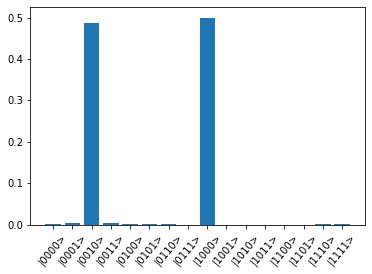

[(0.001136955458922913+0j), (0.00482922718591368+0j), (0.486827647466994+0j), (0.0033799319964464896+0j), (0.0009585806752580886+0j), (0.0004700358402370078+0j), (0.0002967217498910291+0j), (0.00022390438651407365+0j), (0.5001491626776655+0j), (0.0001657225259547321+0j), (0.00015469080674571792+0j), (0.00016071662882818634+0j), (0.0001819875820639628+0j), (0.00022640620868319506+0j), (0.000316533155910014+0j), (0.0005217756539692509+0j)]


In [10]:
res = logicQuBit.Measure([x1,x2,x3,x4])
logicQuBit.Plot()
print(res)

In [11]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

size=4
blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.3] 
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
print(results)

[0.7853981633974483, 3.141592653589793]


In [12]:
# todos possíveis valores
size = 4
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.39269908169872414,
 0.7853981633974483,
 1.1780972450961724,
 1.5707963267948966,
 1.9634954084936207,
 2.356194490192345,
 2.748893571891069,
 3.141592653589793,
 3.5342917352885173,
 3.9269908169872414,
 4.319689898685965,
 4.71238898038469,
 5.105088062083414,
 5.497787143782138,
 5.890486225480862]